In [5]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

In [2]:
%pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# metadata
print(breast_cancer.metadata)

# variable information
print(breast_cancer.variables)

{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [10]:
df = pd.concat([X, y], axis=1)
df.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [14]:
df.tail()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no,recurrence-events
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes,recurrence-events
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no,recurrence-events
284,40-49,ge40,30-34,5-Mar,no,3,left,left_low,no,recurrence-events
285,50-59,ge40,30-34,5-Mar,no,3,left,left_low,no,recurrence-events


In [15]:
df.isnull().sum()

,0
age,0
menopause,0
tumor-size,0
inv-nodes,0
node-caps,8
deg-malig,0
breast,0
breast-quad,1
irradiat,0
Class,0


In [28]:
rows_to_drop = df[df["breast-quad"].isnull()].index
new_df = df.drop(rows_to_drop)
new_df.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no,no-recurrence-events
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no,no-recurrence-events
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no,no-recurrence-events
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events


In [29]:
new_df.shape

(285, 10)

<Axes: xlabel='Class', ylabel='count'>

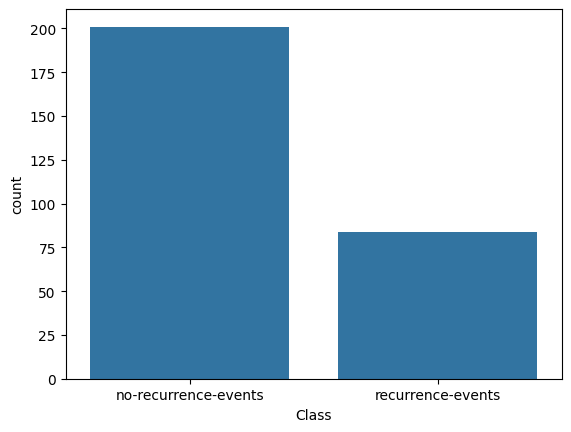

In [30]:
sns.countplot(x="Class", data=new_df)

In [32]:
new_df=pd.get_dummies(df,columns=['age','menopause','tumor-size','inv-nodes','node-caps','breast','breast-quad','irradiat'],drop_first=True)
new_df.head()

,deg-malig,Class,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_14-Oct,...,inv-nodes_24-26,inv-nodes_5-Mar,inv-nodes_8-Jun,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,irradiat_yes
0,3,no-recurrence-events,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,2,no-recurrence-events,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2,no-recurrence-events,False,True,False,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False


In [35]:
x=new_df.drop('Class',axis=1)
y=new_df['Class']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [36]:
model=LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [37]:
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))



                      precision    recall  f1-score   support

no-recurrence-events       0.67      0.92      0.77        37
   recurrence-events       0.57      0.19      0.29        21

            accuracy                           0.66        58
           macro avg       0.62      0.55      0.53        58
        weighted avg       0.63      0.66      0.60        58



In [40]:
us=RandomUnderSampler()
x_train_us,y_train_us=us.fit_resample(x_train,y_train)


In [41]:
model_us=LogisticRegression()
model_us.fit(x_train_us,y_train_us)


LogisticRegression()

In [43]:
y_pred_us=model_us.predict(x_test)
print(classification_report(y_test,y_pred_us))



                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.68      0.71        37
   recurrence-events       0.52      0.62      0.57        21

            accuracy                           0.66        58
           macro avg       0.64      0.65      0.64        58
        weighted avg       0.67      0.66      0.66        58



In [44]:
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [45]:
model_smote=LogisticRegression()
model_smote.fit(x_train_smote,y_train_smote)

LogisticRegression()

In [46]:
y_pred_smote=model_smote.predict(x_test)
print(classification_report(y_test,y_pred_smote))


                      precision    recall  f1-score   support

no-recurrence-events       0.70      0.70      0.70        37
   recurrence-events       0.48      0.48      0.48        21

            accuracy                           0.62        58
           macro avg       0.59      0.59      0.59        58
        weighted avg       0.62      0.62      0.62        58



In [48]:
smt=SMOTETomek()
x_train_smt,y_train_smt=smt.fit_resample(x_train,y_train)

model_smt=LogisticRegression()
model_smt.fit(x_train_smt,y_train_smt)

y_pred_smt=model_smt.predict(x_test)
print(classification_report(y_test,y_pred_smt))

                      precision    recall  f1-score   support

no-recurrence-events       0.72      0.78      0.75        37
   recurrence-events       0.56      0.48      0.51        21

            accuracy                           0.67        58
           macro avg       0.64      0.63      0.63        58
        weighted avg       0.66      0.67      0.67        58

